In [1]:
import cartopy.crs as ccrs
from cmocean import cm 
from dino import Experiment
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import cftime as cft
import xnemogcm as xn
import xgcm

In [7]:
path   = "/data/dkamm/nemo_output/DINO/"
dino_exp = Experiment(path, 'DINO_1deg/restart31')

In [11]:
emp = dino_exp.get_emp()

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dkamm/miniconda3/envs/nemo_env/lib/pyth

In [14]:
mean_last = dino_exp.grid.average(emp.isel(t_d=slice(-3601, -1)),['X', 'Y'])

In [16]:
mean_last.plot()

KeyboardInterrupt: 

In [25]:
climatology = emp.isel(t_d=slice(-3601, -1)).groupby('t_d.dayofyear').mean()

In [26]:
climatology = climatology.compute()

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [32]:
climatology

<xarray.DataArray (dayofyear: 360, y_c: 199, x_c: 62)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -3.08313226e-06, -3.08675624e-06, ...,
         -3.39676835e-06, -3.40284605e-06,             nan],
        [            nan, -2.98975701e-06, -2.99186868e-06, ...,
         -3.33962448e-06, -3.35410389e-06,             nan],
        ...,
        [            nan, -1.47775132e-05, -1.48497581e-05, ...,
         -2.45721656e-05, -2.48012702e-05,             nan],
        [            nan, -1.48535224e-05, -1.49240346e-05, ...,
         -2.44853218e-05, -2.46205669e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -3.08310696e-06, -3.08673198e-06, ...,
         -3.39632179e-06, -3.40247391e-06,             nan],
        [            nan, -2.98720536e-06, -2.98939938e-06, ...,
         -3.33863343e-06, -3.35328689e-06,             nan],
...
        [            nan, -1.49190314e-05, -1.49947810e-05, ...,
         -2.46253987e-05, -2.48601438e-05,             nan],
        [            nan, -1.49979895e-05, -1.50788385e-05, ...,
         -2.45302685e-05, -2.46653799e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -3.08315819e-06, -3.08678079e-06, ...,
         -3.39726075e-06, -3.40323752e-06,             nan],
        [            nan, -2.99249216e-06, -2.99451551e-06, ...,
         -3.34078352e-06, -3.35502061e-06,             nan],
        ...,
        [            nan, -1.47533327e-05, -1.48309921e-05, ...,
         -2.45793404e-05, -2.48034898e-05,             nan],
        [            nan, -1.48307445e-05, -1.49101971e-05, ...,
         -2.44858591e-05, -2.46205214e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * x_c        (x_c) int64 0 1 2 3 4 5 6 7 8 9 ... 52 53 54 55 56 57 58 59 60 61
  * y_c        (y_c) int64 0 1 2 3 4 5 6 7 8 ... 191 192 193 194 195 196 197 198
    gphit      (y_c, x_c) float64 -69.85 -69.85 -69.85 ... 69.85 69.85 69.85
    glamt      (y_c, x_c) float64 -0.5 0.5 1.5 2.5 3.5 ... 57.5 58.5 59.5 60.5
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 354 355 356 357 358 359 360

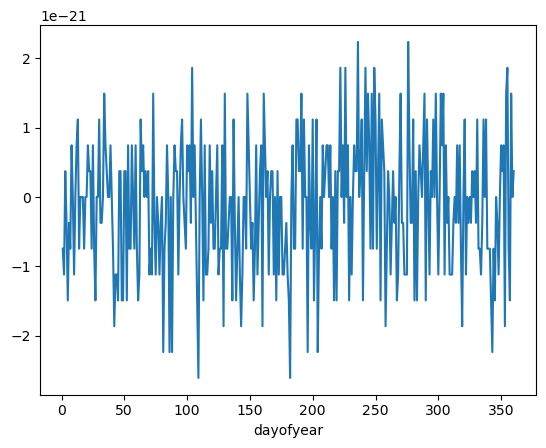

In [29]:
average.plot()

In [6]:
dino_exp.get_emp()

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dkamm/miniconda3/envs/nemo_env/lib/pyth

<xarray.DataArray (t_d: 3600, y_c: 199, x_c: 60)>
dask.array<sub, shape=(3600, 199, 60), dtype=float64, chunksize=(3600, 17, 20), chunktype=numpy.ndarray>
Coordinates:
    time_centered  (t_d) object dask.array<chunksize=(3600,), meta=np.ndarray>
  * t_d            (t_d) object 0501-01-01 12:00:00 ... 0510-12-30 12:00:00
  * x_c            (x_c) int64 0 1 2 3 4 5 6 7 8 ... 51 52 53 54 55 56 57 58 59
  * y_c            (y_c) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198
    gphit          (y_c, x_c) float64 dask.array<chunksize=(17, 20), meta=np.ndarray>
    glamt          (y_c, x_c) float64 dask.array<chunksize=(17, 20), meta=np.ndarray>

In [ ]:
emp         = (dino_exp.data.saltflx / dino_exp.data.sss)
emp_mean    = dino_exp.grid.average(emp, ['X', 'Y'])

In [ ]:
emp_norm= emp - emp_mean

In [ ]:
dino_exp.grid.average(emp_norm, ['X', 'Y']).plot()

In [ ]:
emp_star = dino_exp.get_emp(d=20)

In [ ]:
emp_star_mean = dino_exp.grid.average(emp_star, ['X', 'Y'])

In [ ]:
emp_star_mean.plot()

In [ ]:
emp_star - emp

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10,6))
abs(emp_star - emp).max('t_d').plot(x='glamt', y='gphit', ax=axs, cmap=cm.tempo)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
emp_star.mean('t_d').plot(x='glamt', y='gphit', ax=axs[0])
emp_star.var('t_d').plot(x='glamt', y='gphit', ax=axs[1], norm=colors.LogNorm(), cmap=cm.haline)

In [ ]:
emp_norm.isel(t_d=-1).plot()

## Climatology of EmP field from the last ten years

In [ ]:
climatology = emp_star.groupby('t_d.dayofyear').mean()

In [ ]:
climatology_mean = dino_exp.grid.average(climatology, ['X', 'Y'])

In [ ]:
climatology_mean.plot()

## Seasonal variance of the climatology

In [ ]:
variance = climatology.var('dayofyear')
variance.plot(x='glamt', y='gphit',norm=colors.LogNorm(), cmap=cm.haline)

## Maximum seasonal cycle

In [ ]:
idx_y = variance.argmax(...)['y_c'].values
idx_x = variance.argmax(...)['x_c'].values

In [ ]:
climatology.isel(y_c=idx_y, x_c=idx_x).plot()

In [33]:
climatology = climatology.fillna(0.)
climatology = climatology.rename('emp')

In [34]:
emp_ds = climatology.to_dataset().drop_vars([
    'x_c',
    'y_c',
    'gphit',
    'glamt',
    'dayofyear',
]).rename({'x_c':'x', 'y_c':'y', 'dayofyear':'t'})

In [36]:
emp_ds

<xarray.Dataset>
Dimensions:  (t: 360, y: 199, x: 62)
Dimensions without coordinates: t, y, x
Data variables:
    emp      (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [ ]:
emp_ds.transpose('t', 'x', 'y').to_netcdf('emp_monthly_txy.nc')
emp_ds.transpose('x', 'y', 't').to_netcdf('emp_monthly_xyt.nc')
emp_ds.transpose('y', 'x', 't').to_netcdf('emp_monthly_yxt.nc')

In [35]:
emp_ds.to_netcdf('emp_climatology.nc', encoding={'emp': {'_FillValue': False}})

In [ ]:
path   = "/data/dkamm/nemo_output/DINO/"
test_exp = Experiment(path, 'testEmPfield2')

In [ ]:
test_exp.data.empmr.isel(t_d=-1).plot()

In [ ]:
dino_exp